In [1]:
import pandas as pd
import numpy as np

confusion_matrix = pd.DataFrame({('prediction', 'negative'): [np.nan, np.nan],
                                 ('prediction', 'positive'): [np.nan, np.nan]},
                               index=pd.MultiIndex.from_tuples([('actual', 'negative'), ('actual', 'positive')]))
confusion_matrix 

prediction         
                  negative positive
actual negative        NaN      NaN
       positive        NaN      NaN

## Define model evaluation measures

In [2]:
def precision_fun(confusion_matrix):
    return (confusion_matrix.loc[('actual', 'positive'), ('prediction', 'positive')] /
           confusion_matrix.loc[:, ('prediction', 'positive')].sum())

def recall_fun(confusion_matrix):
    return (confusion_matrix.loc[('actual', 'positive'), ('prediction', 'positive')] /
           confusion_matrix.loc[('actual', 'positive'), :].sum())

def f1_fun(confusion_matrix):
    return 2 * ((precision_fun(confusion_matrix) * recall_fun(confusion_matrix))/
               (precision_fun(confusion_matrix) + recall_fun(confusion_matrix)))

def accuracy_fun(confusion_matrix):
    return ((confusion_matrix.loc[('actual', 'positive'), ('prediction', 'positive')] +
            confusion_matrix.loc[('actual', 'negative'), ('prediction', 'negative')]) /
           confusion_matrix.loc[:, :].sum().sum())

## Define models

In [3]:
def model_coin_flip(ref_class_prop, confusion_matrix):
    
    confusion_matrix.loc[('actual', 'negative'), :] = (1 - ref_class_prop) / 2
    confusion_matrix.loc[('actual', 'positive'), :] = ref_class_prop / 2
    
    return confusion_matrix


def model_reference_category_prediction(ref_class_prop, confusion_matrix):
    
    confusion_matrix.loc[:, ('prediction', 'negative')] = 0
    confusion_matrix.loc[('actual', 'negative'), ('prediction', 'positive')] = 1 - ref_class_prop
    confusion_matrix.loc[('actual', 'positive'), ('prediction', 'positive')] = ref_class_prop
    
    return confusion_matrix


def model_class_imbalance_prediction(ref_class_prop, confusion_matrix):
    
    confusion_matrix.loc[('actual', 'negative'), ('prediction', 'negative')] = (1 - ref_class_prop)**2
    confusion_matrix.loc[('actual', 'positive'), ('prediction', 'negative')] = (1 - ref_class_prop) * ref_class_prop
    confusion_matrix.loc[('actual', 'negative'), ('prediction', 'positive')] = (1 - ref_class_prop) * ref_class_prop
    confusion_matrix.loc[('actual', 'positive'), ('prediction', 'positive')] = ref_class_prop**2
    
    return confusion_matrix

## Calculate model evaluation measures for each levels of reference class proportion

In [4]:
list_measures = ['precision', 'recall', 'f1', 'accuracy']
df = pd.DataFrame(columns = pd.MultiIndex.from_tuples(list(zip(['coin_flip']*4 + ['ref_cat']*4 + ['class_imbalance']*4, list_measures*3))))
df

Empty DataFrame
Columns: [(coin_flip, precision), (coin_flip, recall), (coin_flip, f1), (coin_flip, accuracy), (ref_cat, precision), (ref_cat, recall), (ref_cat, f1), (ref_cat, accuracy), (class_imbalance, precision), (class_imbalance, recall), (class_imbalance, f1), (class_imbalance, accuracy)]
Index: []

In [5]:
models_fun = [model_coin_flip, 
          model_reference_category_prediction,
         model_class_imbalance_prediction]

models_col = ['coin_flip', 
              'ref_cat',
              'class_imbalance']

for m in range(len(models_fun)):
    for i, ref_class_prop in enumerate(np.linspace(0, 1, 300)):
        #print(i)
        #print(ref_class_prop)
    
        confusion_matrix = models_fun[m](ref_class_prop, confusion_matrix)
    
        df.loc[i, 'ref_class_prop'] = ref_class_prop
        df.loc[i, (models_col[m], 'precision')] = precision_fun(confusion_matrix)
        df.loc[i, (models_col[m], 'recall')] = recall_fun(confusion_matrix)
        df.loc[i, (models_col[m], 'f1')] = f1_fun(confusion_matrix)
        df.loc[i, (models_col[m], 'accuracy')] = accuracy_fun(confusion_matrix)

df.index = df.loc[:, 'ref_class_prop']        
df.head()

C:\Users\Richard\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\Users\Richard\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


coin_flip                                 ref_cat         \
               precision recall          f1 accuracy   precision recall   
ref_class_prop                                                            
0.000000        0.000000    NaN         NaN      0.5           0    NaN   
0.003344        0.003344    0.5  0.00664452      0.5  0.00334448      1   
0.006689        0.006689    0.5   0.0132013      0.5  0.00668896      1   
0.010033        0.010033    0.5   0.0196721      0.5   0.0100334      1   
0.013378        0.013378    0.5   0.0260586      0.5   0.0133779      1   

                                       class_imbalance              \
                        f1    accuracy       precision      recall   
ref_class_prop                                                       
0.000000               NaN           0             NaN         NaN   
0.003344        0.00666667  0.00334448      0.00334448  0.00334448   
0.006689          0.013289  0.00668896      0.00668896  0.00668896   
0.010033         0.0198675   0.0100334       0.0100334   0.0100334   
0.013378         0.0264026   0.0133779       0.0133779   0.0133779   

                                     ref_class_prop  
                        f1  accuracy                 
ref_class_prop                                       
0.000000               NaN         1       0.000000  
0.003344        0.00334448  0.993333       0.003344  
0.006689        0.00668896  0.986712       0.006689  
0.010033         0.0100334  0.980134       0.010033  
0.013378         0.0133779  0.973602       0.013378

## Visualisation by Model

In [6]:
def nuss_style_fun(ax, title, author_line=True):
    
    #remove top and right frame parts
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set left and bottom axis to grey
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    
    # set ticks to grey
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    
    #set labels to grey
    ax.yaxis.label.set_color('grey')
    ax.xaxis.label.set_color('grey') 
    
    # align axis labels with axis ends
    ax.set_xlabel(xlabel=None,
                  position=[0, 0],
                  horizontalalignment='left',
                  color='grey',
                  size=14)
    ax.set_ylabel(ylabel=None,
                  position=[0, 1],
                  horizontalalignment='right',
                  color='grey',
                  size=14)
    
    #align title
    ax.set_title(label=title,
                 loc='left',
                 color=(0.41, 0.41, 0.41),
                 size=16)
    
    #author line
    if author_line:
        fig.text(0.99, 0.01, '@rikunert', color='lightgrey', style='italic',
             horizontalalignment='right')
    
    return ax

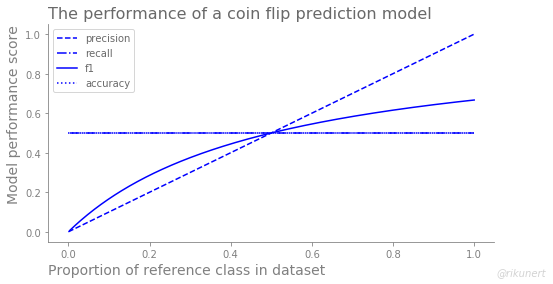

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[8, 4])
ax = nuss_style_fun(ax, 'The performance of a coin flip prediction model')
df.loc[:, 'coin_flip'].plot(ax=ax, 
                            style=['b--', 'b-.', 'b-', 'b:'])

for text in ax.legend().get_texts():
    text.set_color((0.41, 0.41, 0.41))
    
ax.set(xlabel='Proportion of reference class in dataset',
      ylabel='Model performance score')

fig.savefig('coin_flip.png', bbox_inches='tight')

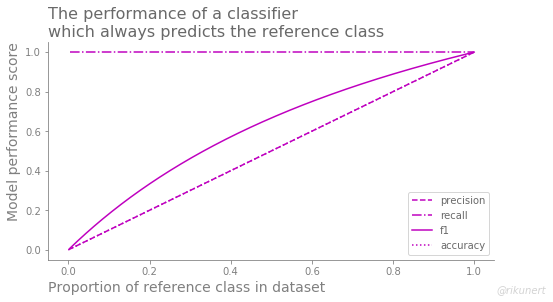

In [8]:
fig, ax = plt.subplots(figsize=[8, 4])
ax = nuss_style_fun(ax, 'The performance of a classifier\nwhich always predicts the reference class')

df.loc[:, 'ref_cat'].plot(ax=ax, 
                            style=['m--', 'm-.', 'm-', 'm:'])

for text in ax.legend().get_texts():
    text.set_color((0.41, 0.41, 0.41))
    
ax.set(xlabel='Proportion of reference class in dataset',
      ylabel='Model performance score')

fig.savefig('positive_only.png', bbox_inches='tight')

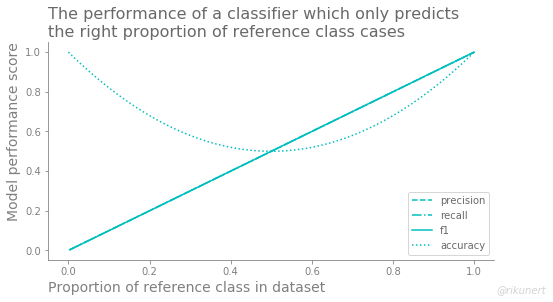

In [9]:
fig, ax = plt.subplots(figsize=[8, 4])
ax = nuss_style_fun(ax, 'The performance of a classifier which only predicts \nthe right proportion of reference class cases')

df.loc[:, 'class_imbalance'].plot(ax=ax, 
                            style=['c--', 'c-.', 'c-', 'c:'])

for text in ax.legend().get_texts():
    text.set_color((0.41, 0.41, 0.41))
    
ax.set(xlabel='Proportion of reference class in dataset',
      ylabel='Model performance score')

fig.savefig('right_proportion.png', bbox_inches='tight')

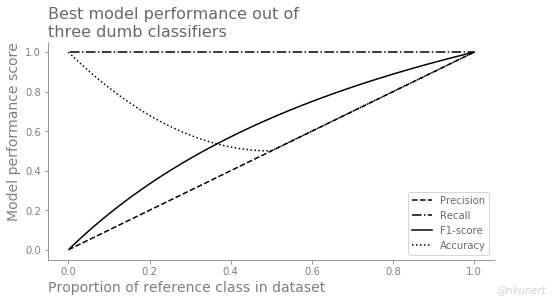

In [10]:
# best value of the three classifiers

fig, ax = plt.subplots(figsize=[8, 4])
ax = nuss_style_fun(ax, 'Best model performance out of\nthree dumb classifiers')

df.loc[:, pd.IndexSlice[:, 'precision']].max(axis=1).plot(ax=ax, style='k--')
df.loc[:, pd.IndexSlice[:, 'recall']].max(axis=1).plot(ax=ax, style='k-.')
df.loc[:, pd.IndexSlice[:, 'f1']].max(axis=1).plot(ax=ax, style='k-')
df.loc[:, pd.IndexSlice[:, 'accuracy']].max(axis=1).plot(ax=ax, style='k:')

for text in ax.legend(labels=['Precision', 'Recall', 'F1-score', 'Accuracy']).get_texts():
    text.set_color((0.41, 0.41, 0.41))
    
ax.set(xlabel='Proportion of reference class in dataset',
      ylabel='Model performance score')

fig.savefig('best_dumb.png', bbox_inches='tight')

## Visualisation by measure

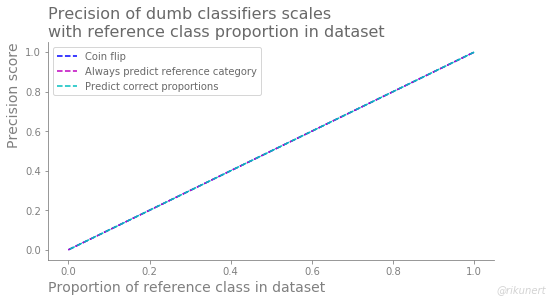

In [11]:
fig, ax = plt.subplots(figsize=[8, 4])
ax = nuss_style_fun(ax, 'Precision of dumb classifiers scales\nwith reference class proportion in dataset')

df.loc[:, pd.IndexSlice[:, 'precision']].plot(ax=ax, 
                            style=['b--', 'm--', 'c--'])
ax.set(xlabel='Proportion of reference class in dataset',
      ylabel='Precision score')

for text in ax.legend(['Coin flip', 'Always predict reference category', 'Predict correct proportions']).get_texts():
    text.set_color((0.41, 0.41, 0.41))
    
fig.savefig('precision_summary.png', bbox_inches='tight')

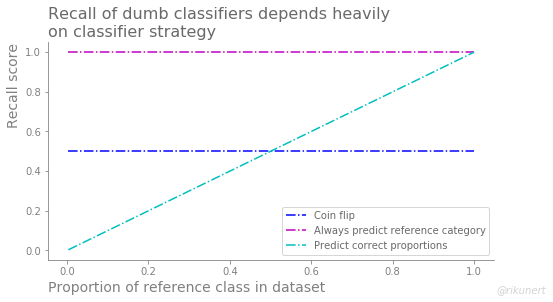

In [12]:
fig, ax = plt.subplots(figsize=[8, 4])
ax = nuss_style_fun(ax, 'Recall of dumb classifiers depends heavily\non classifier strategy')

df.loc[:, pd.IndexSlice[:, 'recall']].plot(ax=ax, 
                            style=['b-.', 'm-.', 'c-.'])
ax.set(xlabel='Proportion of reference class in dataset',
      ylabel='Recall score')

for text in ax.legend(['Coin flip', 'Always predict reference category', 'Predict correct proportions']).get_texts():
    text.set_color((0.41, 0.41, 0.41))

fig.savefig('recall_summary.png', bbox_inches='tight')

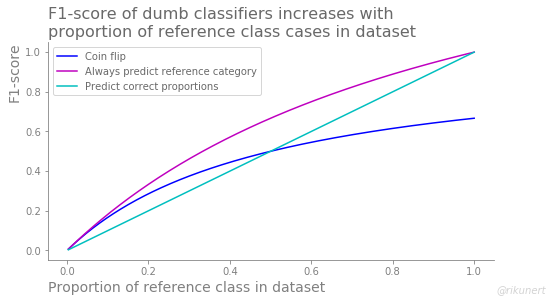

In [13]:
fig, ax = plt.subplots(figsize=[8, 4])
ax = nuss_style_fun(ax, 'F1-score of dumb classifiers increases with\nproportion of reference class cases in dataset')

df.loc[:, pd.IndexSlice[:, 'f1']].plot(ax=ax, 
                            style=['b-', 'm-', 'c-'])
ax.set(xlabel='Proportion of reference class in dataset',
      ylabel='F1-score')

for text in ax.legend(['Coin flip', 'Always predict reference category', 'Predict correct proportions']).get_texts():
    text.set_color((0.41, 0.41, 0.41))

fig.savefig('f1_summary.png', bbox_inches='tight')

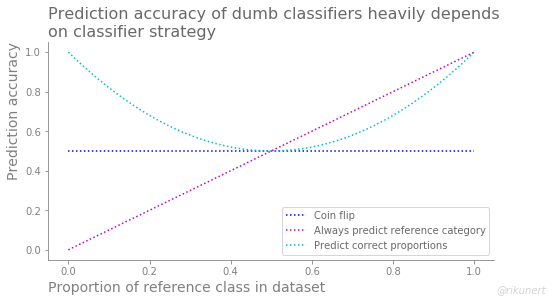

In [14]:
fig, ax = plt.subplots(figsize=[8, 4])
ax = nuss_style_fun(ax, 'Prediction accuracy of dumb classifiers heavily depends\non classifier strategy')

df.loc[:, pd.IndexSlice[:, 'accuracy']].plot(ax=ax, 
                            style=['b:', 'm:', 'c:'])
ax.set(xlabel='Proportion of reference class in dataset',
      ylabel='Prediction accuracy')

for text in ax.legend(['Coin flip', 'Always predict reference category', 'Predict correct proportions']).get_texts():
    text.set_color((0.41, 0.41, 0.41))

fig.savefig('accuracy_summary.png', bbox_inches='tight')